In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset

from sklearn.linear_model import LogisticRegression # linear model for classification

from sklearn.metrics import confusion_matrix

In [0]:
data = pd.read_csv("telco.csv")
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [0]:
# total number of null/empty/not available entries in a column
data['TotalCharges'].isna().sum()

11

In [0]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Composition

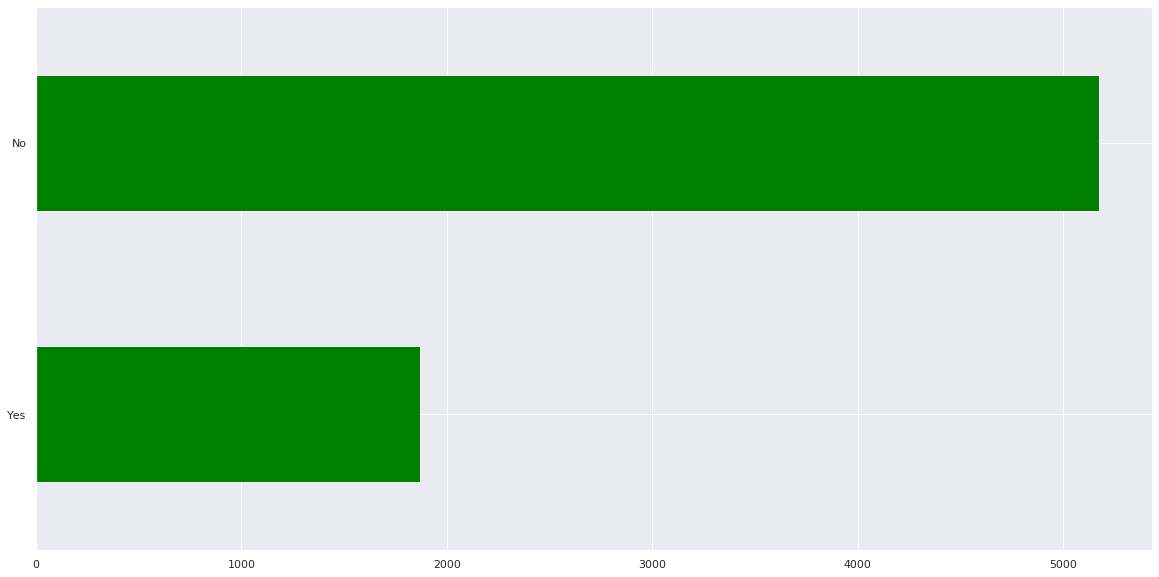

In [0]:
# In the whole dataset, how many churned?
data.Churn.value_counts().plot(kind='barh', color='green')
plt.gca().invert_yaxis()

The data is imbalanced -- there are more than twice as many not-churned than churn.

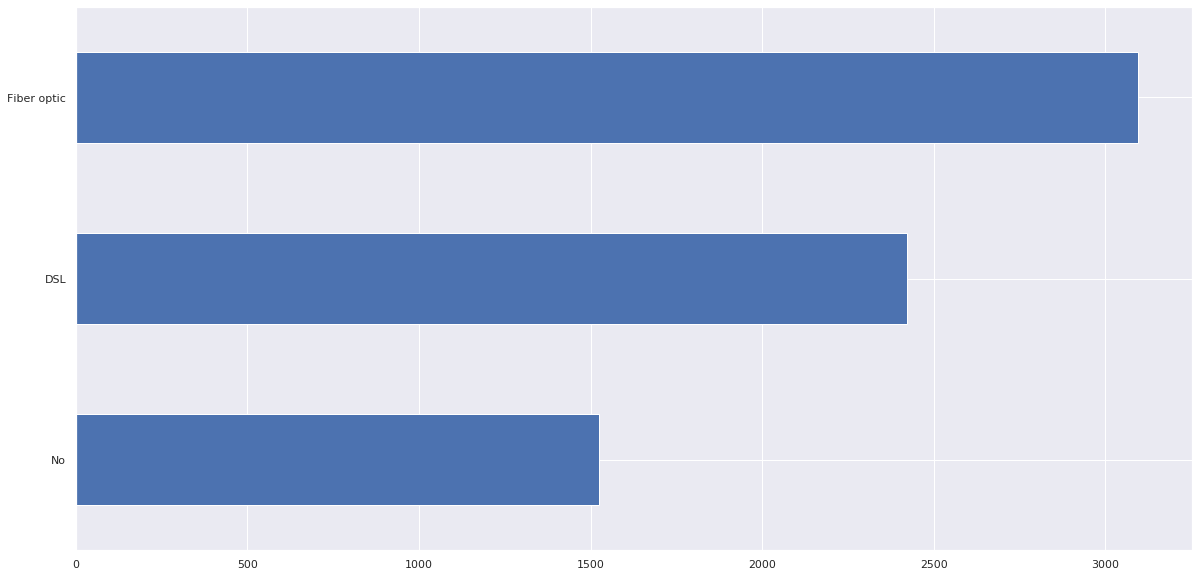

In [0]:
# How many people are subsribed to each type of internet service
data.InternetService.value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

In [0]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


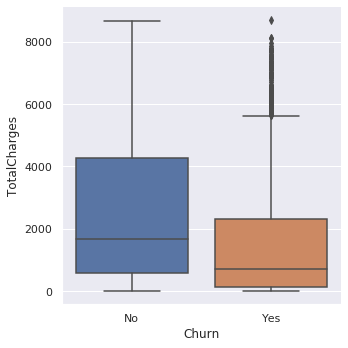

In [0]:
sns.catplot(data=data,
            x='Churn',
            y='TotalCharges',
            kind='box')

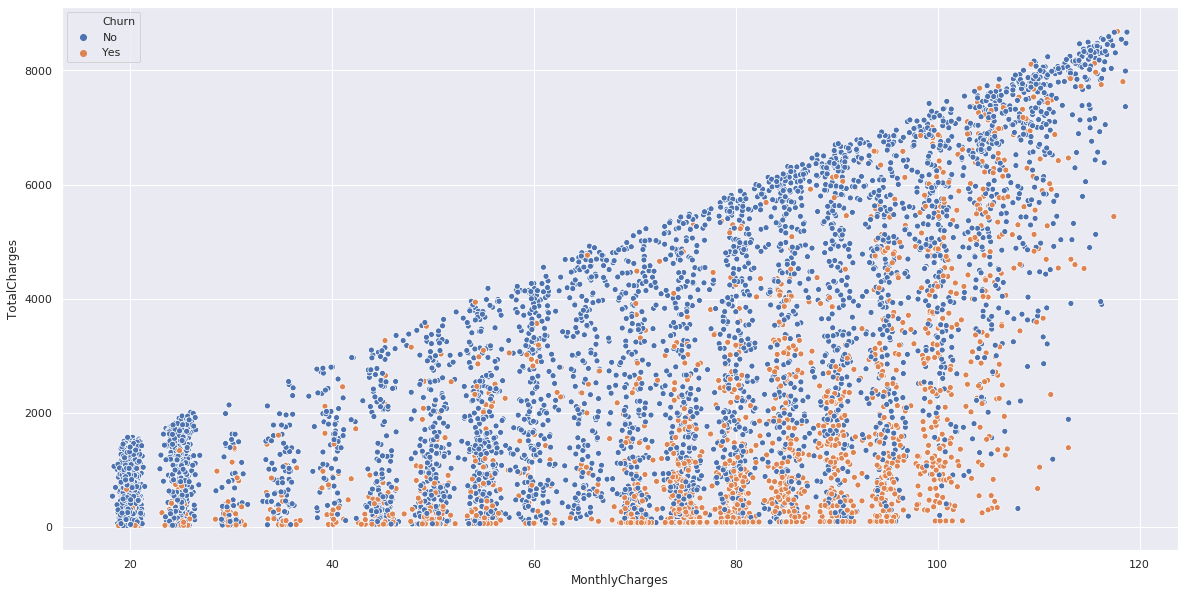

In [0]:
sns.scatterplot(data=data,
            x='MonthlyCharges',
            y='TotalCharges',
            hue='Churn')

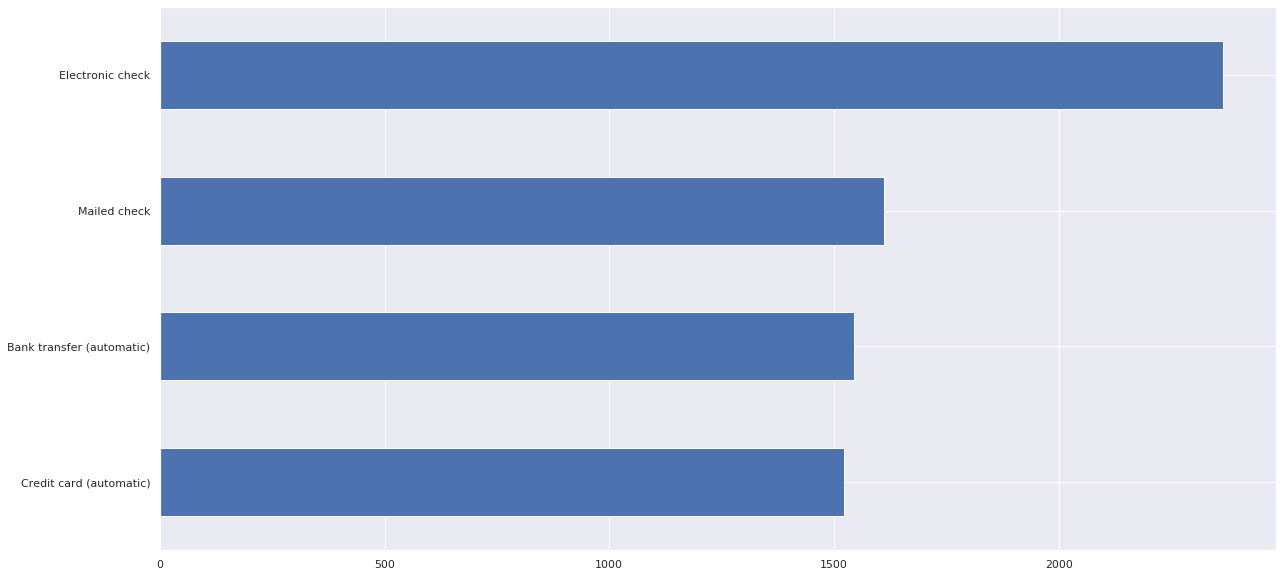

In [0]:
# How many people are subsribed to each payment method
data.PaymentMethod.value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

### Relationship

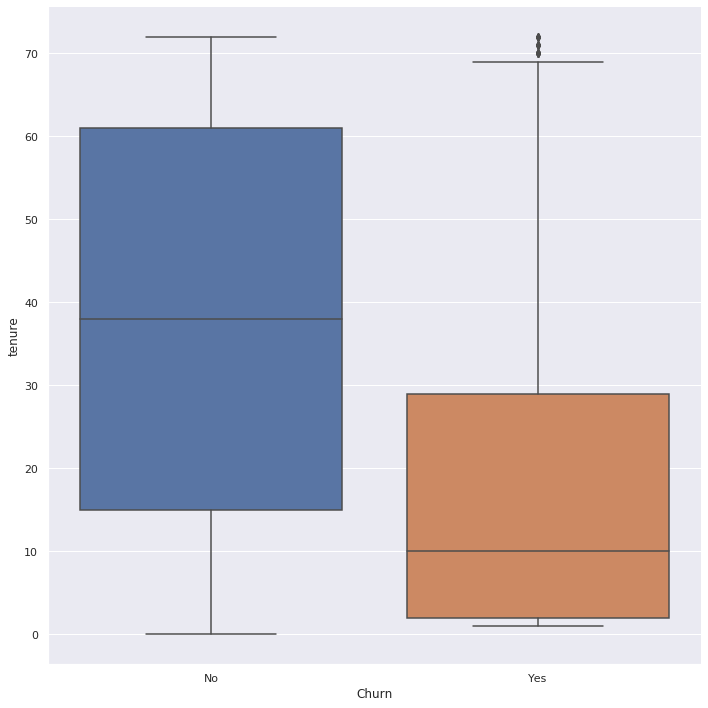

In [0]:
# How is tenure related churn?
sns.catplot(data=data,
            x='Churn',
            y='tenure',
            kind='box',
            height=10)

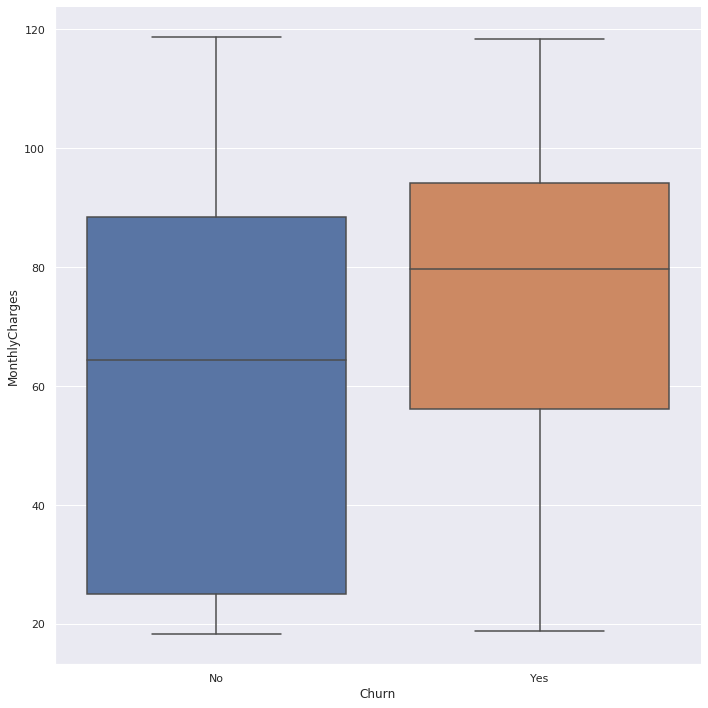

In [0]:
# How are monthly charges related churn?
sns.catplot(data=data,
            x='Churn',
            y='MonthlyCharges',
            kind='box',
            height=10)

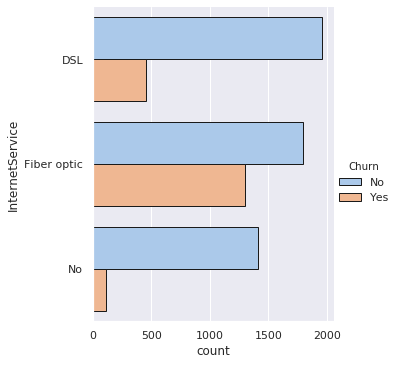

In [0]:
#how Internet Services related to churn?

sns.catplot(y="InternetService", hue="Churn", kind="count",
            palette="pastel", edgecolor=".10",
            data=data);

Customers with fiber are more probable to churn than those with DSL connection

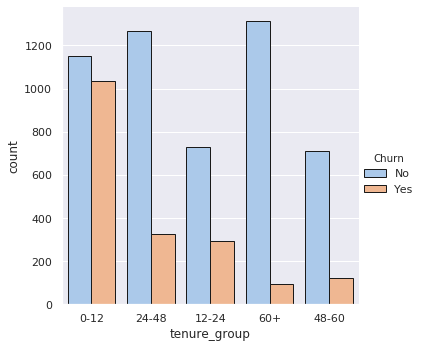

In [0]:
#Tenure to categorical column
def tenure_lab(data) :
    
    if data["tenure"] <= 12 :
        return "0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 48) :
        return "24-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60) :
        return "48-60"
    elif data["tenure"] > 60 :
        return "60+"
data["tenure_group"] = data.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)
#how tenure groups related to churn?
sns.catplot(x='tenure_group', hue='Churn', kind = 'count', palette='pastel', edgecolor='.1', data=data)

#sns.lineplot(y='tenure_group', x='count', hue='Churn', style = 'event')

Recent Clients are more likely to churn



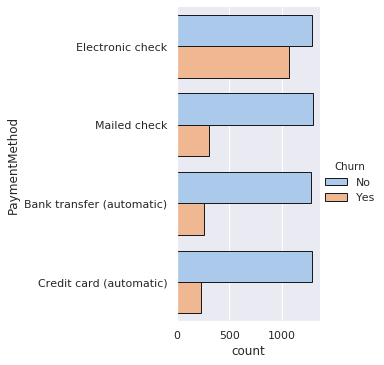

In [0]:
# How Payment Method related to churn?

sns.catplot(y="PaymentMethod", hue="Churn", kind="count",
            palette="pastel", edgecolor=".10",
            data=data);

Electronic check has a very high churn rate

### Compute Likelihood (when comparing categorical feature to categorical target)

In [0]:
# How likely are senior citizen going to churn?
pd.crosstab(data.SeniorCitizen,
            data.Churn)

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [0]:
# Probability of churning if not senior citizen
1393/(1393 + 4508)

0.23606168446026096

In [0]:
# Probability of churning if senior citizen
476/(476 + 666)

0.4168126094570928

Senior Citizen have higher probability of churning compared to not senior citizen.

In [0]:
# How many rows and columns
data.shape

(7043, 22)

In [0]:

# How many senior citizen 
data.SeniorCitizen.sum()

1142

In [0]:
# How likely are different types of internet service attributing to churn?
pd.crosstab(data.InternetService,
            data.Churn)

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [0]:
# Probability of churning if DSL
459/(459+1962)

0.1895910780669145

In [0]:
# Probability of churning if Fiber Optic
1297/(1297+1799)

0.4189276485788114

In [0]:
# Probability of churning if no internet service
113/(1413 + 113)

0.07404980340760157

In [0]:
# How likely are people who have multiple lines churn?
pd.crosstab(data.MultipleLines,
            data.Churn)

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


In [0]:
#Probability of churning if no multiple lines
849/(849+2541)

0.2504424778761062

In [0]:
#Probability of churning if no internet service
170/(170+512)

0.24926686217008798

In [0]:
#Probability of churning if with multiple lines
850/(850+2121)

0.286098956580276

### Distribution

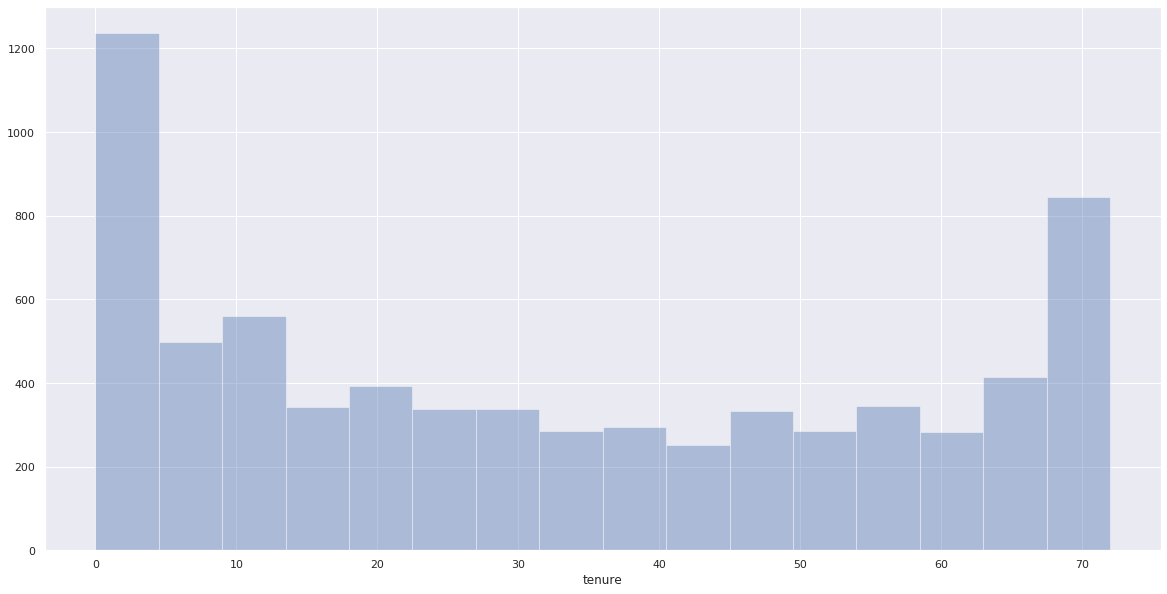

In [0]:
# What is the distribution of tenure
sns.distplot(data.tenure, kde=False)

In [0]:
data.loc[5:10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-12
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,12-24
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0-12
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,24-48
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,60+
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,12-24


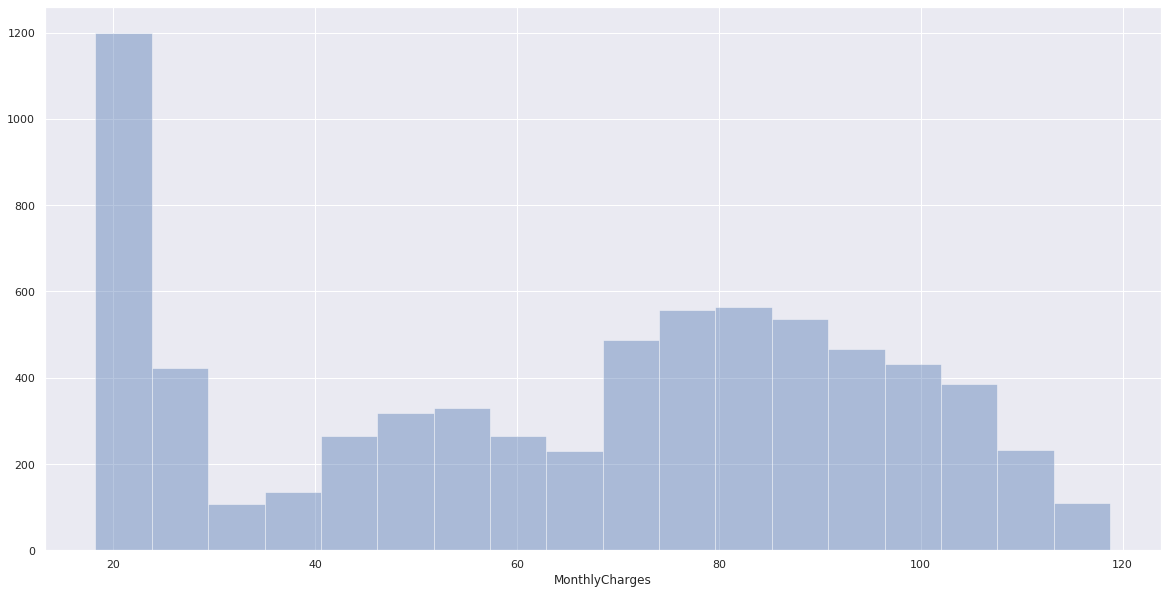

In [0]:
# What is the distribution of Monthly Charges
sns.distplot(data.MonthlyCharges, kde=False)

In [0]:
data["SeniorCitizen"].head()

0    0
1    0
2    0
3    0
4    0
Name: SeniorCitizen, dtype: int64

In [0]:
data.shape

(7043, 22)

In [0]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_group         object
dtype: object

In [0]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

In [0]:
# Create new data
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

new_data = data[columns]

In [0]:
# Dummify new data
dum_data = pd.get_dummies(new_data)

In [0]:
dum_data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [0]:
# Use len() to get umber of entries in a list or array
len(dum_data.columns)

47

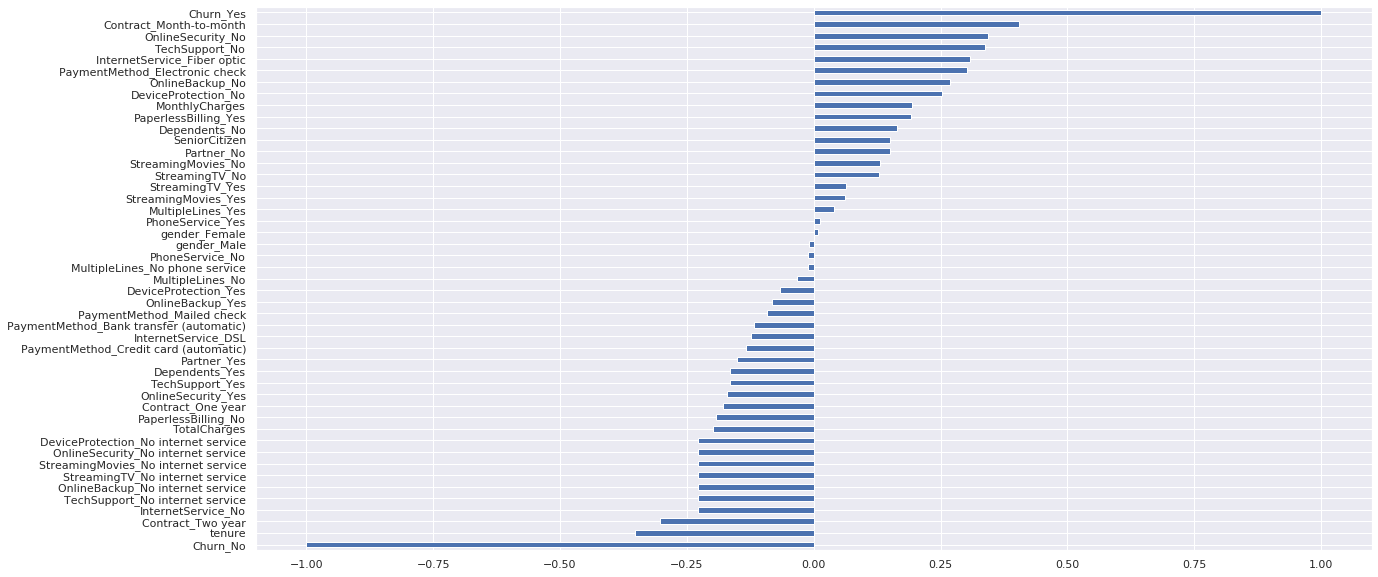

In [0]:
# List of strongly correlated features to churn
dum_data.corr().sort_values('Churn_Yes', ascending=False)['Churn_Yes'].plot(kind='barh')
plt.gca().invert_yaxis()

In [0]:
# Get correlations with Churn and remove Churn_Yes and Churn_No
churn_correlations = dum_data.corr().sort_values('Churn_Yes', ascending=False)['Churn_Yes'].drop(['Churn_Yes', 'Churn_No'])

# Get high correlations (higher than 20% correlation)
filtered_churn_correlations = churn_correlations[np.abs(churn_correlations) > 0.2]


In [0]:
filtered_churn_correlations

Contract_Month-to-month                 0.405103
OnlineSecurity_No                       0.342637
TechSupport_No                          0.337281
InternetService_Fiber optic             0.308020
PaymentMethod_Electronic check          0.301919
OnlineBackup_No                         0.268005
DeviceProtection_No                     0.252481
DeviceProtection_No internet service   -0.227890
OnlineSecurity_No internet service     -0.227890
StreamingMovies_No internet service    -0.227890
StreamingTV_No internet service        -0.227890
OnlineBackup_No internet service       -0.227890
TechSupport_No internet service        -0.227890
InternetService_No                     -0.227890
Contract_Two year                      -0.302253
tenure                                 -0.352229
Name: Churn_Yes, dtype: float64

In [0]:
# write list of features we want to use
features = filtered_churn_correlations.index


# Set X
X = dum_data[features]

In [0]:
X.columns

Index(['Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'OnlineBackup_No', 'DeviceProtection_No',
       'DeviceProtection_No internet service',
       'OnlineSecurity_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'OnlineBackup_No internet service',
       'TechSupport_No internet service', 'InternetService_No',
       'Contract_Two year', 'tenure'],
      dtype='object')

In [0]:
X.head()

,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,DeviceProtection_No internet service,OnlineSecurity_No internet service,StreamingMovies_No internet service,StreamingTV_No internet service,OnlineBackup_No internet service,TechSupport_No internet service,InternetService_No,Contract_Two year,tenure
0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,34
2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,45
4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,2


In [0]:
# Set y
y = dum_data["Churn_Yes"]

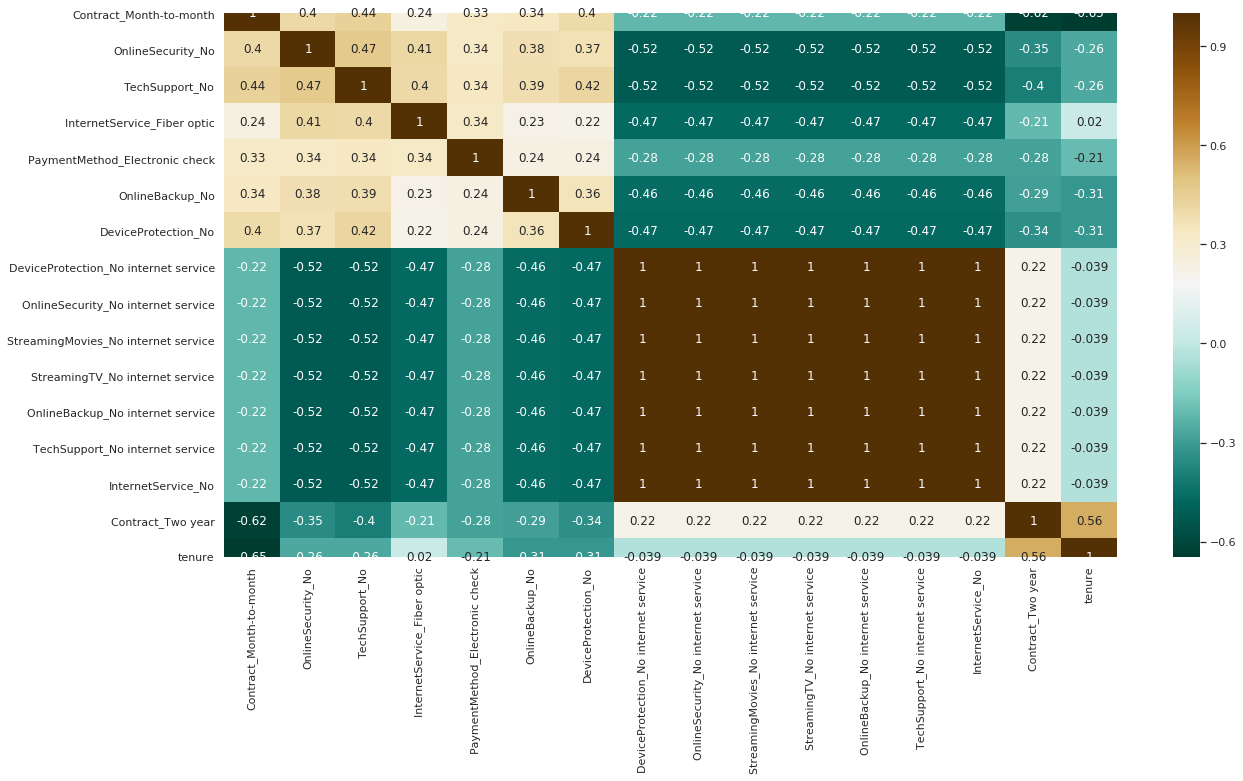

In [0]:
sns.heatmap(dum_data[filtered_churn_correlations.index].corr (), annot=True, cmap='BrBG_r' )

In [0]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# metrics (accuracy)
acc = log_reg.score(X_test, y_test)


# predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
acc

0.8133427963094393

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[938,  98],
       [165, 208]])

In [0]:
# Probability of predicting not churn (True Negative Rate)
938/(938 + 98)

0.9054054054054054

In [0]:
# Probability of predicting churn (True Positive Rate)
208/(208 + 165)

0.5576407506702413

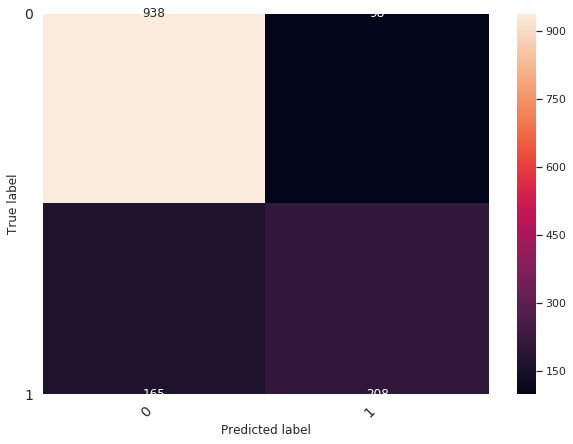

In [0]:
print_confusion_matrix(cm, [0, 1])
plt.show()

Your model is more sure in predicting people who are NOT going to churn, than those who are gonna churn.

Recommendations: 
- explore other data we can collect or incorporate more features (or different permutations of features) into the model.
- try different modelling techniques (to be discussed in class)